In [1]:
import numpy as np


**Import Libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


**Load Data**

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784) / 255.0
x_test  = x_test.reshape(-1, 784) / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Baseline Model (Overfitting)**

In [4]:
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

h1 = model1.fit(x_train, y_train,
                epochs=50,
                validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8728 - loss: 0.4610 - val_accuracy: 0.9572 - val_loss: 0.1490
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9583 - loss: 0.1379 - val_accuracy: 0.9678 - val_loss: 0.1132
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9730 - loss: 0.0889 - val_accuracy: 0.9678 - val_loss: 0.1068
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9809 - loss: 0.0633 - val_accuracy: 0.9690 - val_loss: 0.0992
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9861 - loss: 0.0483 - val_accuracy: 0.9757 - val_loss: 0.0865
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9902 - loss: 0.0361 - val_accuracy: 0.9739 - val_loss: 0.0894
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9921 - loss: 0.0284 - val_accuracy: 0.9735 - val_loss: 0.0886
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9938 - loss: 0.0228 -

**Model with Dropout**

In [5]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

h2 = model2.fit(x_train, y_train,
                epochs=50,
                validation_split=0.2)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7950 - loss: 0.6697 - val_accuracy: 0.9472 - val_loss: 0.1846
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9258 - loss: 0.2538 - val_accuracy: 0.9613 - val_loss: 0.1342
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9390 - loss: 0.2027 - val_accuracy: 0.9663 - val_loss: 0.1146
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9466 - loss: 0.1732 - val_accuracy: 0.9680 - val_loss: 0.1092
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9507 - loss: 0.1592 - val_accuracy: 0.9696 - val_loss: 0.1072
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9577 - loss: 0.1435 - val_accuracy: 0.9708 - val_loss: 0.1039
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9567 - loss: 0.1378 - val_accuracy: 0.9706 - val_loss: 0.1031
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9607 - loss: 0.1264 -

**Model with L2 Regularizationt**

In [6]:
model3 = Sequential([
    Dense(128, activation='relu',
          kernel_regularizer=l2(0.001),
          input_shape=(784,)),
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

h3 = model3.fit(x_train, y_train,
                epochs=50,
                validation_split=0.2)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8618 - loss: 0.6148 - val_accuracy: 0.9522 - val_loss: 0.2646
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9518 - loss: 0.2590 - val_accuracy: 0.9603 - val_loss: 0.2203
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9627 - loss: 0.2129 - val_accuracy: 0.9621 - val_loss: 0.2101
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9687 - loss: 0.1878 - val_accuracy: 0.9674 - val_loss: 0.1920
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9692 - loss: 0.1820 - val_accuracy: 0.9653 - val_loss: 0.1901
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9720 - loss: 0.1734 - val_accuracy: 0.9672 - val_loss: 0.1848
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9746 - loss: 0.1606 - val_accuracy: 0.9716 - val_loss: 0.1700
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9758 - loss: 0.1580 - 

**Model with Batch Normalization**

In [7]:
model4 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

h4 = model4.fit(x_train, y_train,
                epochs=50,
                validation_split=0.2)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8762 - loss: 0.4087 - val_accuracy: 0.9574 - val_loss: 0.1390
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9629 - loss: 0.1285 - val_accuracy: 0.9638 - val_loss: 0.1149
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9718 - loss: 0.0906 - val_accuracy: 0.9693 - val_loss: 0.1005
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0765 - val_accuracy: 0.9712 - val_loss: 0.0973
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9800 - loss: 0.0636 - val_accuracy: 0.9703 - val_loss: 0.1018
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9828 - loss: 0.0527 - val_accuracy: 0.9722 - val_loss: 0.0953
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9844 - loss: 0.0474 - val_accuracy: 0.9732 - val_loss: 0.0994
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9859 - loss: 0.0429 -

**Compare**

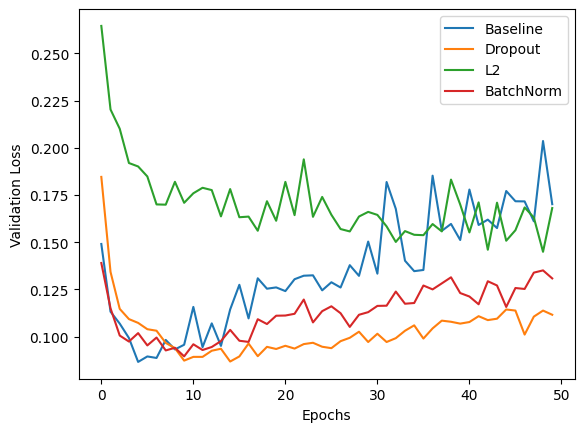

In [8]:
plt.plot(h1.history['val_loss'], label='Baseline')
plt.plot(h2.history['val_loss'], label='Dropout')
plt.plot(h3.history['val_loss'], label='L2')
plt.plot(h4.history['val_loss'], label='BatchNorm')

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()


**Simple Accuracy Graph**

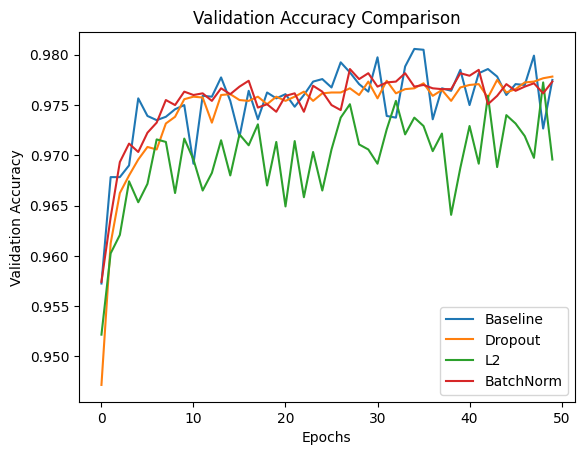

In [9]:
plt.plot(h1.history['val_accuracy'], label='Baseline')
plt.plot(h2.history['val_accuracy'], label='Dropout')
plt.plot(h3.history['val_accuracy'], label='L2')
plt.plot(h4.history['val_accuracy'], label='BatchNorm')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.show()
